# <h1 align="center"> <font color='Red'><font size=6> Netflix - Exploratory Data Analysis </font> </font></h1>

<h2 align='right'>- <font color='green'><b> Vijay Kumar</b></font></h2>

**Introduction:**

Netflix is one of the most popular media and video streaming platforms. They
have over 8000 movies or tv shows available on their platform, as of mid-2021,
they have over 200M Subscribers globally.

**Objective:**

Analyzing the data and generating insights helps Netflix decide which type of
shows/movies to produce and how to grow the business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.colors import ListedColormap
import calendar as cd


In [ ]:
data=pd.read_csv('/content/netflix.csv')

In [ ]:
# @title Initial reading of data

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


We have been given Netflix data to analyse using
- The no of shows
- Types of shows
- No of directors
- Different cast members
- Countries they were produced in
- When they were released and when they were added to netflix
- What kind of rating has been issued to them  with respect the viewing audience
- How long is a movie in minutes or a TV Show in seasons
- What genres does a show fall under and its description

In [ ]:
data.shape

(8807, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Pre-Processing observations
- Given Netflix data has 8807 rows and 12 columns
- Release_year column is of the type Integer
- 11 columns are of the data type object
- 3 of the columns have huge amount of null values that need to be imputed
- Other 3 columns with null values can be dropped due to negligable no of null values
- 4 of the columns('Director','listed_in','cast','country')have multiple values in them that need to be seperated using split and exploding based on commas
- Date_added column needs to be converted into date type from object type
- Type column lists if the given show is a Movie or a TV Show

In [ ]:
data_cleaned=data.copy()

In [ ]:
# @title Basic Analysis-Handling Null values

data_cleaned['date_added']=pd.to_datetime(data_cleaned['date_added'],format='mixed')

In [ ]:
data_cleaned['director'].fillna('unknown_director',inplace=True)
data_cleaned['cast'].fillna('unknown_cast',inplace=True)
data_cleaned['country'].fillna('unknown_country',inplace=True)

In [ ]:
data_cleaned['rating']=data_cleaned['rating'].replace('74 min','unknown_rating')
data_cleaned['rating']=data_cleaned['rating'].replace('84 min','unknown_rating')
data_cleaned['rating']=data_cleaned['rating'].replace('66 min','unknown_rating')

In [ ]:
#2null values not dropping
data_cleaned.dropna(subset=['date_added','rating','duration'],inplace=True)


In [ ]:
data_cleaned.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [ ]:
#@title Un-nesting Columns

In [ ]:
data_unnested=data_cleaned.copy()

In [ ]:
data_unnested['cast_exploded']=data_unnested['cast'].str.split(',')

In [ ]:
data_unnested['listed_in_exploded']=data_unnested['listed_in'].str.split(',')

In [ ]:
data_unnested['country_exploded']=data_unnested['country'].str.split(',')

In [ ]:
data_unnested['director_exploded']=data_unnested['director'].str.split(',')

In [ ]:
data_unnested=data_unnested.explode('cast_exploded')

In [ ]:
data_unnested=data_unnested.explode('listed_in_exploded')

In [ ]:
data_unnested=data_unnested.explode('director_exploded')

In [ ]:
data_unnested=data_unnested.explode('country_exploded')

In [ ]:
data_unnested.drop(['cast','listed_in','director','country'],axis=1,inplace=True)

In [ ]:
data_unnested.rename(columns={'listed_in_exploded':'genre','country_exploded':'country','director_exploded':'director','cast_exploded':'actor'},inplace=True)

In [ ]:
data_unnested = data_unnested.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
data_unnested.head()

,show_id,type,title,date_added,release_year,rating,duration,description,actor,genre,country,director
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",unknown_cast,Documentaries,United States,Kirsten Johnson
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,South Africa,unknown_director
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas,South Africa,unknown_director
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries,South Africa,unknown_director
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,South Africa,unknown_director


In [ ]:
data_unnested.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201837 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201837 non-null  object        
 1   type          201837 non-null  object        
 2   title         201837 non-null  object        
 3   date_added    201837 non-null  datetime64[ns]
 4   release_year  201837 non-null  int64         
 5   rating        201837 non-null  object        
 6   duration      201837 non-null  object        
 7   description   201837 non-null  object        
 8   actor         201837 non-null  object        
 9   genre         201837 non-null  object        
 10  country       201837 non-null  object        
 11  director      201837 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.0+ MB


In [ ]:
data_unnested.shape

(201837, 12)

In [ ]:
data_unnested.drop_duplicates(inplace=True)

In [ ]:
data_unnested.shape

(201782, 12)

## Pre Processing of data
- Steps taken to process data for use are:
  -
  - Date_added has been converted to DateTime type
  - Nulll values dropped in 'Date_added', 'Rating', 'Duration'
  - Null values in the 'Director". 'Cast', 'Country' have been replaced and set to Unknown
  - Leading and trailing spaces in Country has been removed to maintain uniformity of the data
  - Outlier values of Rating category have been set Unknown
  - After Unnesting the above  mentioned columns to create a row of each respectrive values we get the final dataset ready to analyse and find insights has '201782' rows with same 12 columns


In [ ]:
# @title 1. Find the counts of each categorical variable both using graphical and nongraphical analysis.

In [ ]:
#@title a. For Non-graphical Analysis:
data_unnested['show_id'].nunique()

8790

We have 8790 different shows on Netflix

In [ ]:
data_cleaned['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

- No of Movies:- 6126
- No of shows:- 2664

In [ ]:
data_cleaned['title'].nunique()

8790

All the 8790 shows have been found to have a unique title

In [ ]:
data_unnested['director'].nunique()

4992

There are 4992 different directors having 1 or more of their shows released on Netflix

In [ ]:
data_unnested['actor'].nunique()

36393

A total of 36393 have acted in shows that are on the Netflix platform

In [ ]:
data_unnested['genre'].nunique()

42

Shows on Netflix can be categorized into 42 different Genres

In [ ]:
data_unnested['country'].nunique()

124

The production of shows across the world has taken place in a whopping 124 countries bringing in diverse views from different demographics

In [ ]:
data_cleaned['date_added'].dt.year.value_counts()

date_added
2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

While Netflix started adding shows to its platforms in 2008, the number of shows added has exponentially risen in its first 10 years with the peak no of shows added coming between 2018-2020

In [ ]:
data['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

Shows on Netflix go as for beyond as early 20th century bringing audience contnet from different stages of history to be devoured while shows from recent history has been staggering

In [ ]:
data_cleaned['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Netflix caters to all set of audience having huge no of shows for viewers allowing them to select between shows set for their age and mental and emotional preference

In [ ]:
# @title b. For graphical analysis:



In [ ]:
#@title TV Shows vs Movies
#plt.figure(figsize=(15,10))
#sns.countplot(x='type',data=data_cleaned,hue='type')
#plt.show()

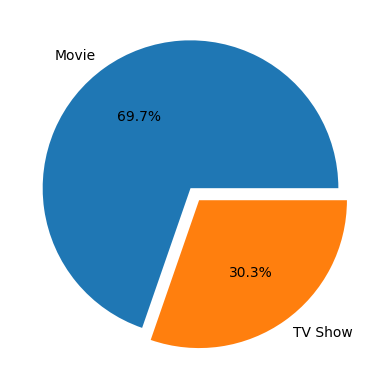

In [ ]:
plt.pie(data_cleaned['type'].value_counts(),autopct='%1.1f%%',explode=(0.05,0.05),labels=data_cleaned['type'].value_counts().index)
plt.show()

Almost 70% of the shows on the platform are movies while 30% of the titles are TV Shows

In [ ]:
#@title Rating Countplot

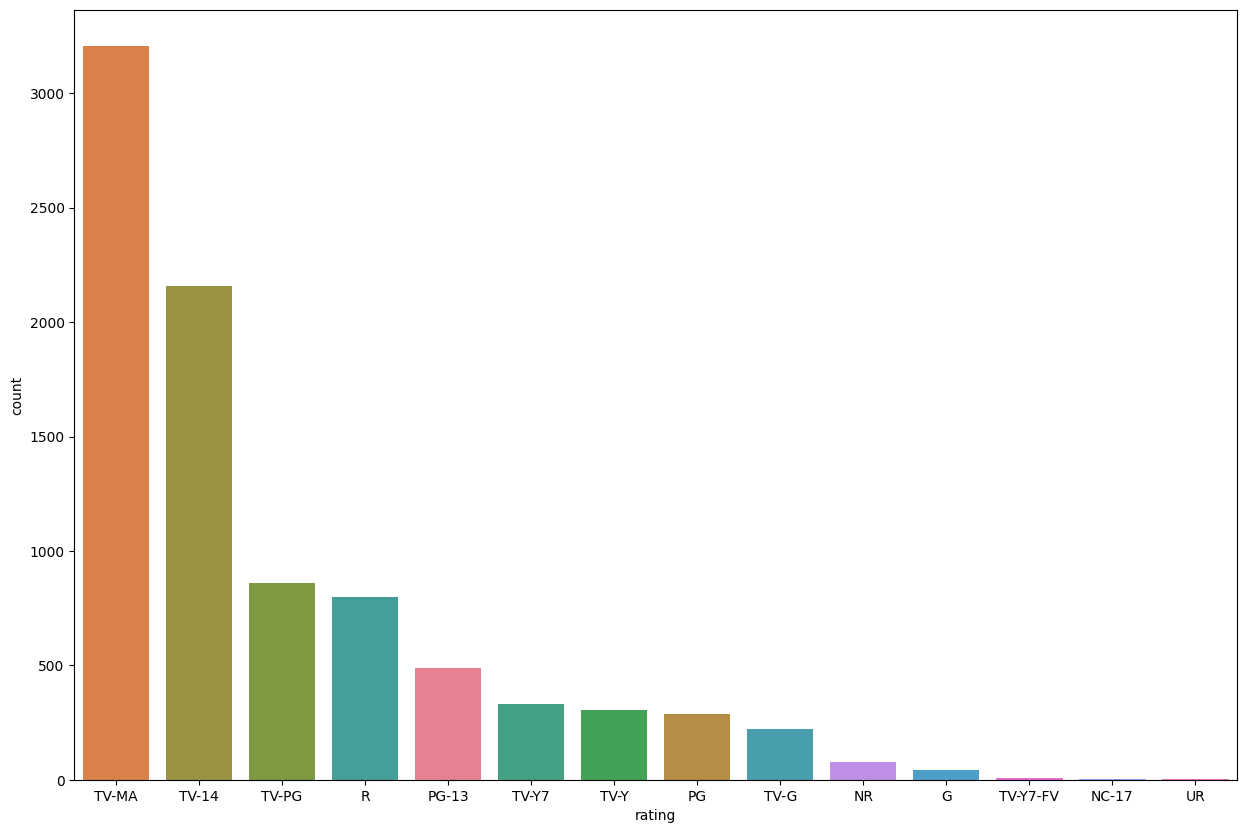

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='rating',data=data_cleaned,hue='rating',order=data_cleaned['rating'].value_counts().index[:])
plt.show()

Most titles on Netflix are for viewers who can be categorized as mature followed by audience above the age of 14. Also a good chunk of shows are advised to be watched under parental guidance for children closely followed by shows restricted for age under 17 without adult supervision


In [ ]:
#@title Titles by country
country_data1=data_unnested[data_unnested['country']!='unknown_country']

In [ ]:
country_data1=country_data1.drop_duplicates(subset=['show_id','country'],keep='first')

In [ ]:
bar_data=country_data1.groupby(['country'])['show_id'].count().sort_values(ascending=False).head(10)

<ipython-input-453-b3e64bade9c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bar_data.index,y=bar_data,palette='Greens_r')


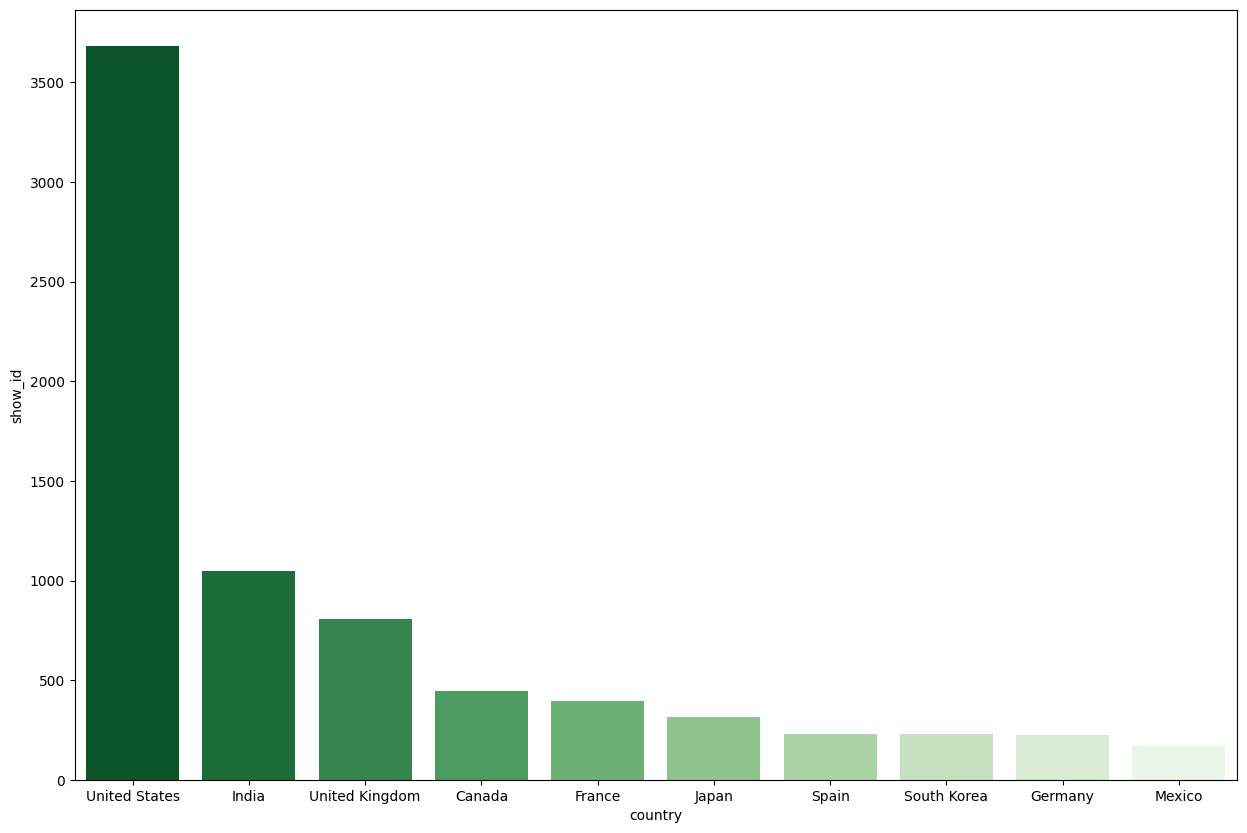

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=bar_data.index,y=bar_data,palette='Greens_r')
plt.show()

United States has a huge capture in the no of shows on Netflix while 6-10 of the Top 10 are fairly closer to each other than on the top

In [ ]:
#@title Date added v Type

In [ ]:
date_added_data1=data_cleaned.drop_duplicates(subset=['show_id'],keep='first')

In [ ]:
date_added_data1['year']=date_added_data1['date_added'].dt.year

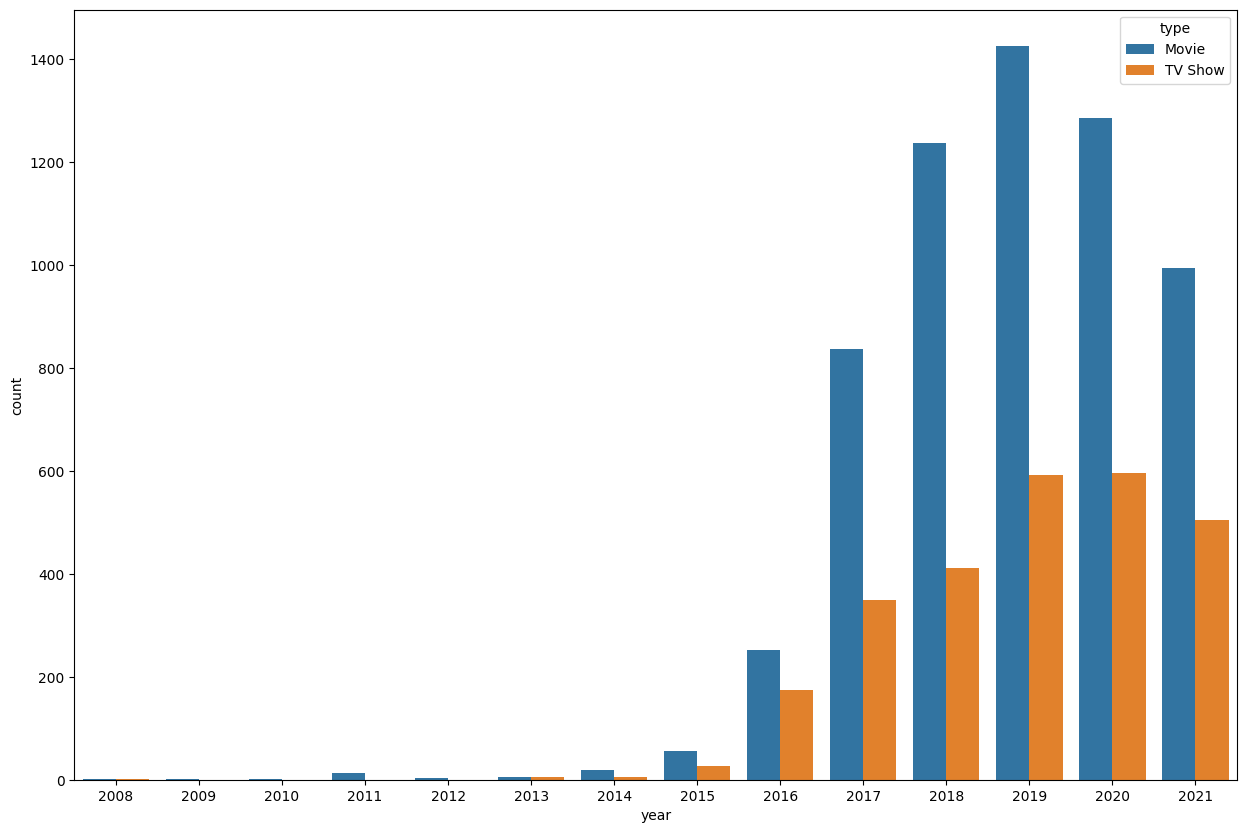

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='year',data=date_added_data1,hue='type')
plt.show()

Netflix added most of the shows on its platform between 2018 and 2020 with 2019 seeing the highest of additions in both Movies and TV Show

In [ ]:
#@title Release Year
hist_data1=data_cleaned.drop_duplicates(subset=['show_id'],keep='first')

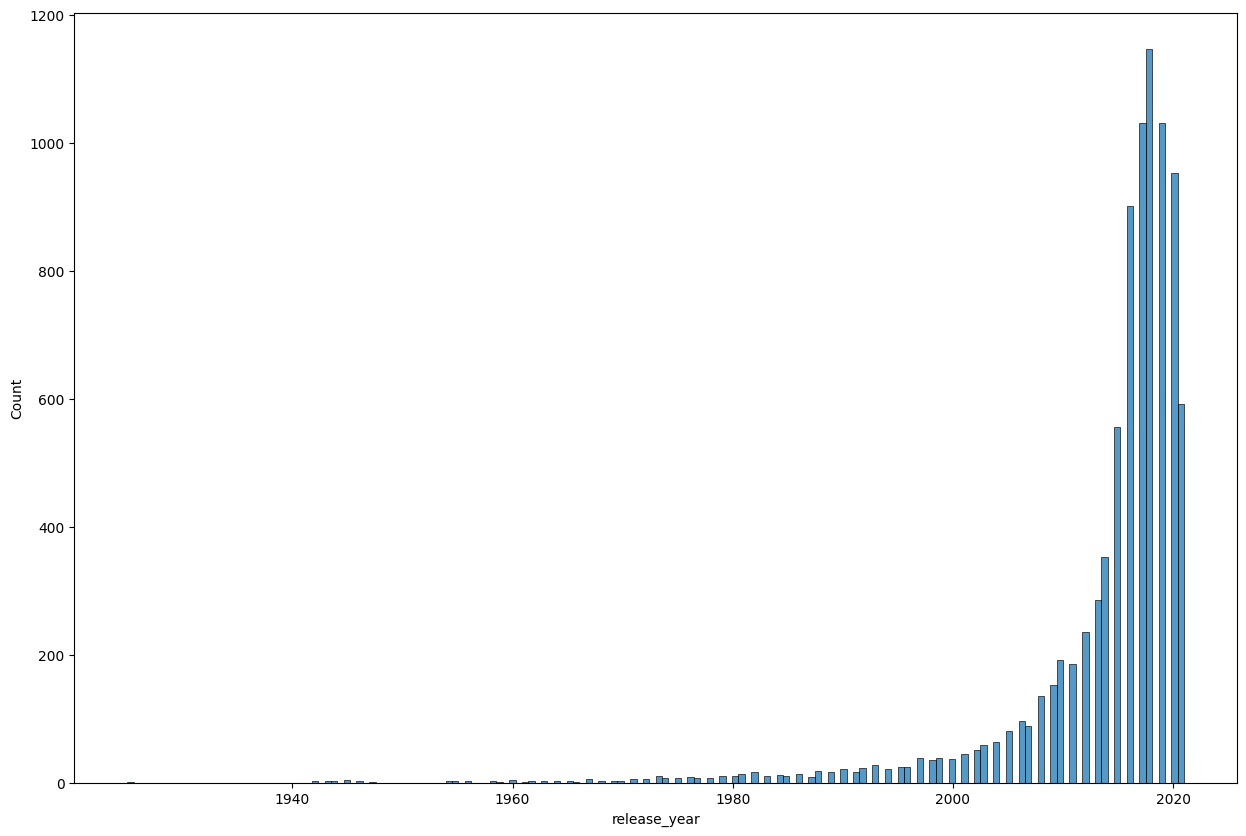

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=hist_data1,x='release_year',fill=True)
plt.show()

Majority of shows on Netflix are released after the year 2000 while the post 2010 shows take huge chunks of those

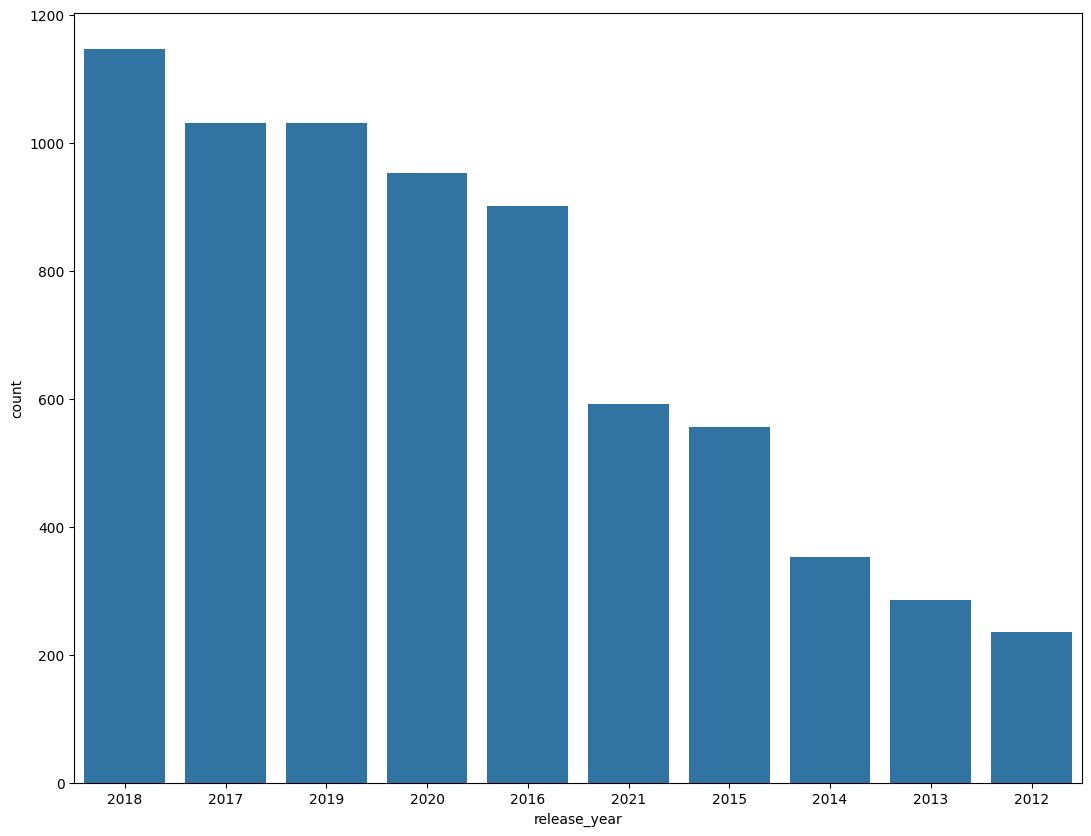

In [ ]:
#@title Top 10 release years
plt.figure(figsize=(13,10))
sns.countplot(x='release_year',data=data_cleaned,order=data_cleaned['release_year'].value_counts().index[0:10])
plt.show()

Shows released between 2015 and 2020 are the most common ones on Netflix

In [ ]:
#@title Duration(Movies)
movie_duration=data_cleaned[data_cleaned['type']=='Movie']

In [ ]:
movie_duration['duration']=movie_duration['duration'].str.replace(' min','')

In [ ]:
movie_duration['duration']=movie_duration['duration'].astype(str).astype(float)

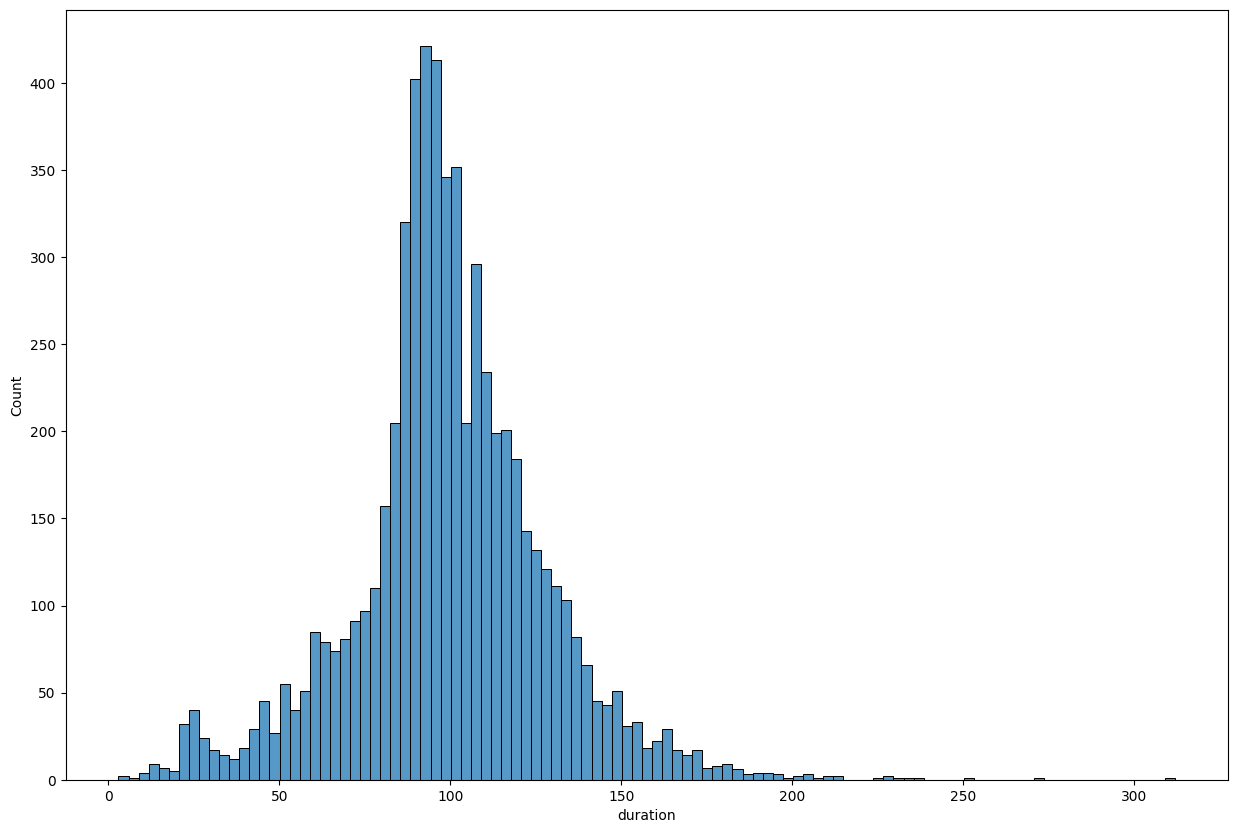

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=movie_duration,x='duration',fill=True)
plt.show()

Most Movies on netflix are 90 min to 110 long

In [ ]:
#@title  Duration(TV Shows)

In [ ]:
tv_duration_data=data_unnested.drop_duplicates(subset=['show_id'],keep='first')

In [ ]:
tv_duration_data=tv_duration_data[(tv_duration_data['rating']!='unknown_rating')& (duration_data_1['type']=='TV Show')]

In [ ]:
tv_duration_data['duration']=tv_duration_data['duration'].str.split(' ').str[0]

In [ ]:
tv_duration_data['duration']=tv_duration_data['duration'].astype(str).astype(int)

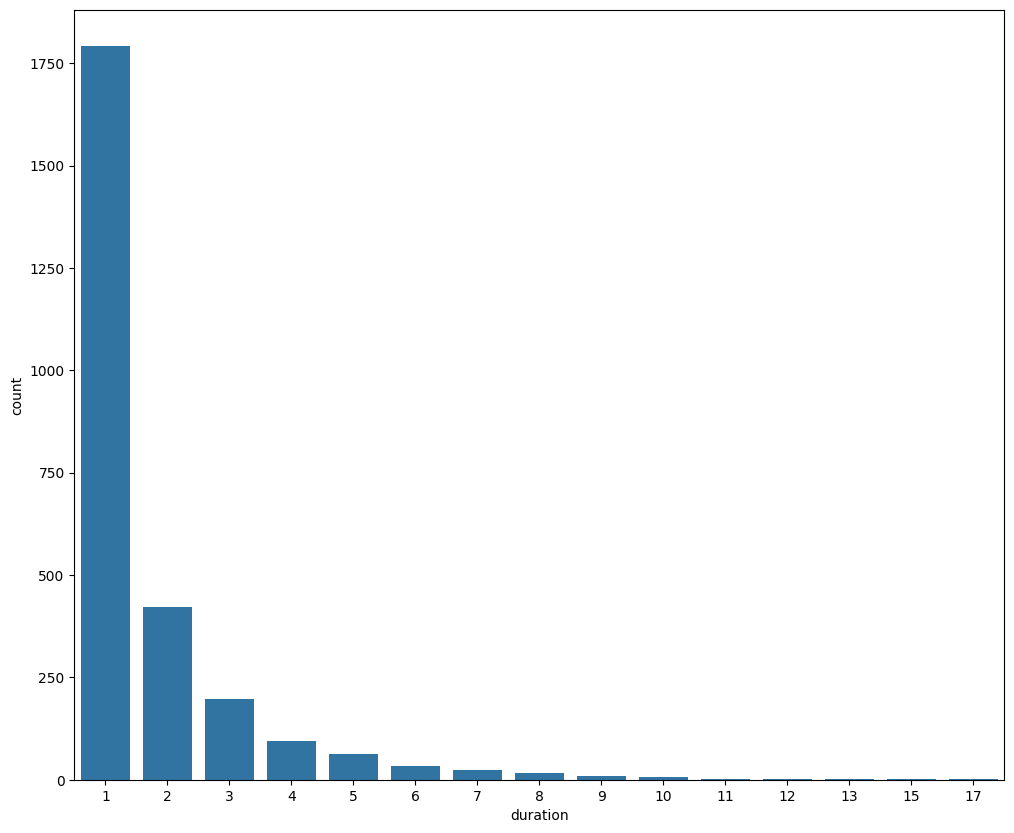

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x='duration',data=tv_duration_data)
plt.show()

Most of the TV Shows on netflix are only a season long while no of shows with multiple seasons drop fairly steeps after 5 seasons

In [ ]:
#@title Movies vs TV Shows

In [ ]:
box_data1=data_cleaned.drop_duplicates(subset=['show_id'],keep='first')

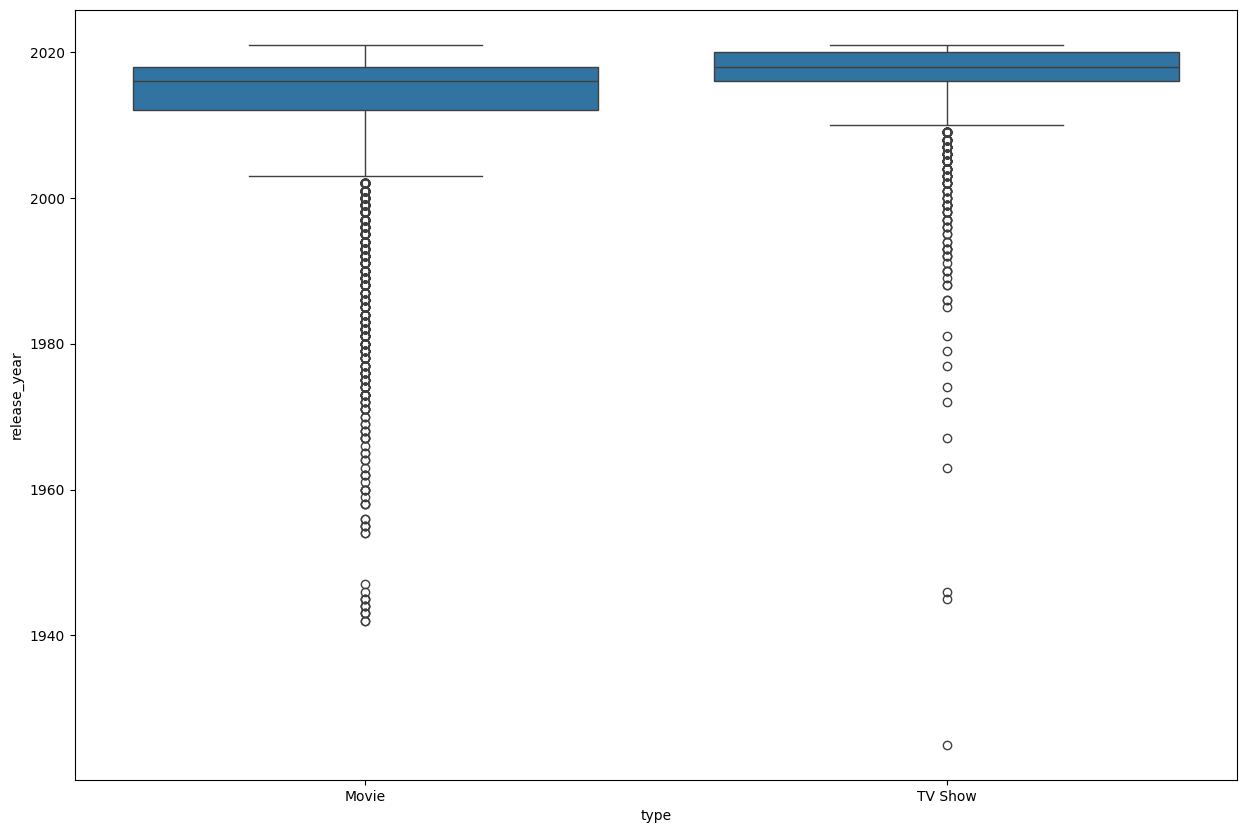

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='type',y='release_year',data=box_data1)
plt.show()

Most of the TV Shows on netflix are fairly recent with a higher median value when compared to the Movies on the platform,with Movies released having a fair few more outliers when compared to release of TV Shows

In [ ]:
#@title Heatmap


In [ ]:
heatmap_data1=data_unnested.drop_duplicates(subset=['show_id'],keep='first')

In [ ]:
# @title
heatmap_data1['year_added']=heatmap_data1['date_added'].dt.year
heatmap_data1['month_added']=heatmap_data1['date_added'].dt.month

In [ ]:
type_encoded=pd.get_dummies(heatmap_data1['type'],prefix='type')

In [ ]:
heatmap_encoded=pd.concat([heatmap_data1,type_encoded],axis=1)

In [ ]:
correlation_data=heatmap_encoded[['release_year', 'year_added', 'month_added', 'type_Movie', 'type_TV Show']]

In [ ]:
heat_map_corr_matrix=correlation_data.corr()

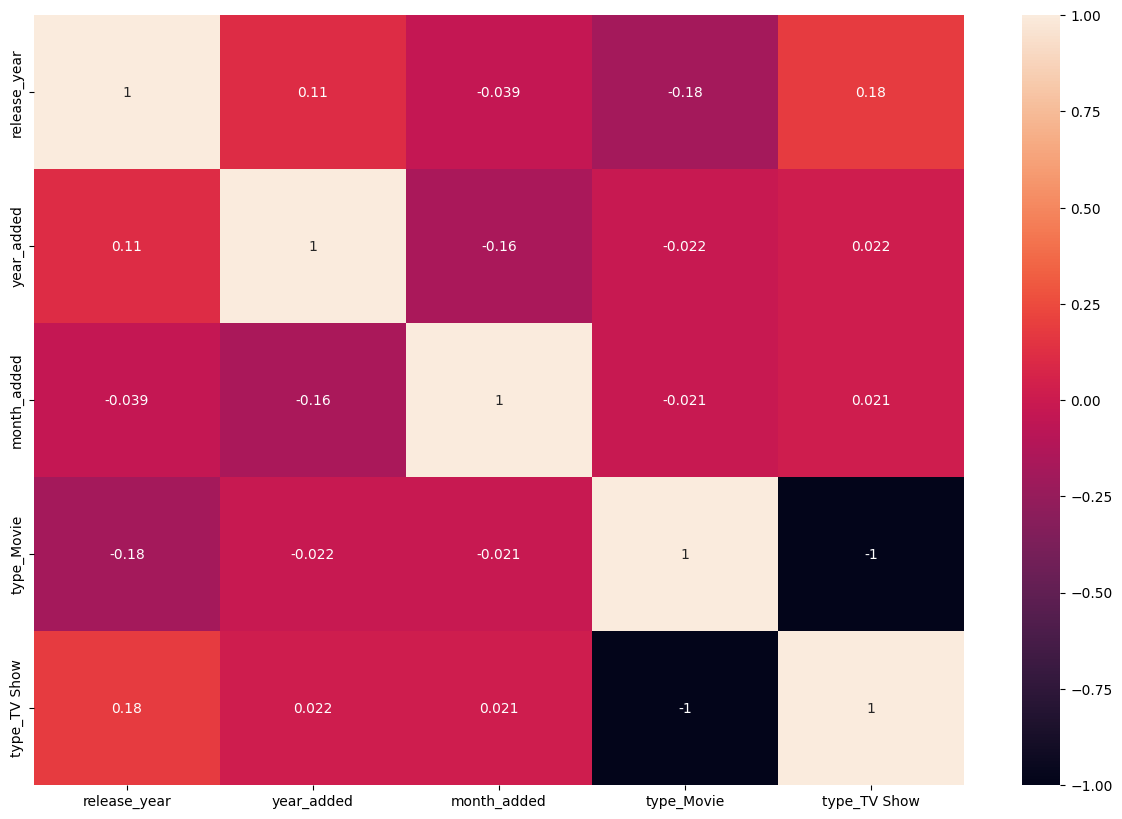

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(heat_map_corr_matrix,annot=True)
plt.show()

By the above heatmap we can infer that TV Shows have the highest correlation with release year movies have a negative correlation with every other numerical category in the data

<Figure size 1500x1000 with 0 Axes>

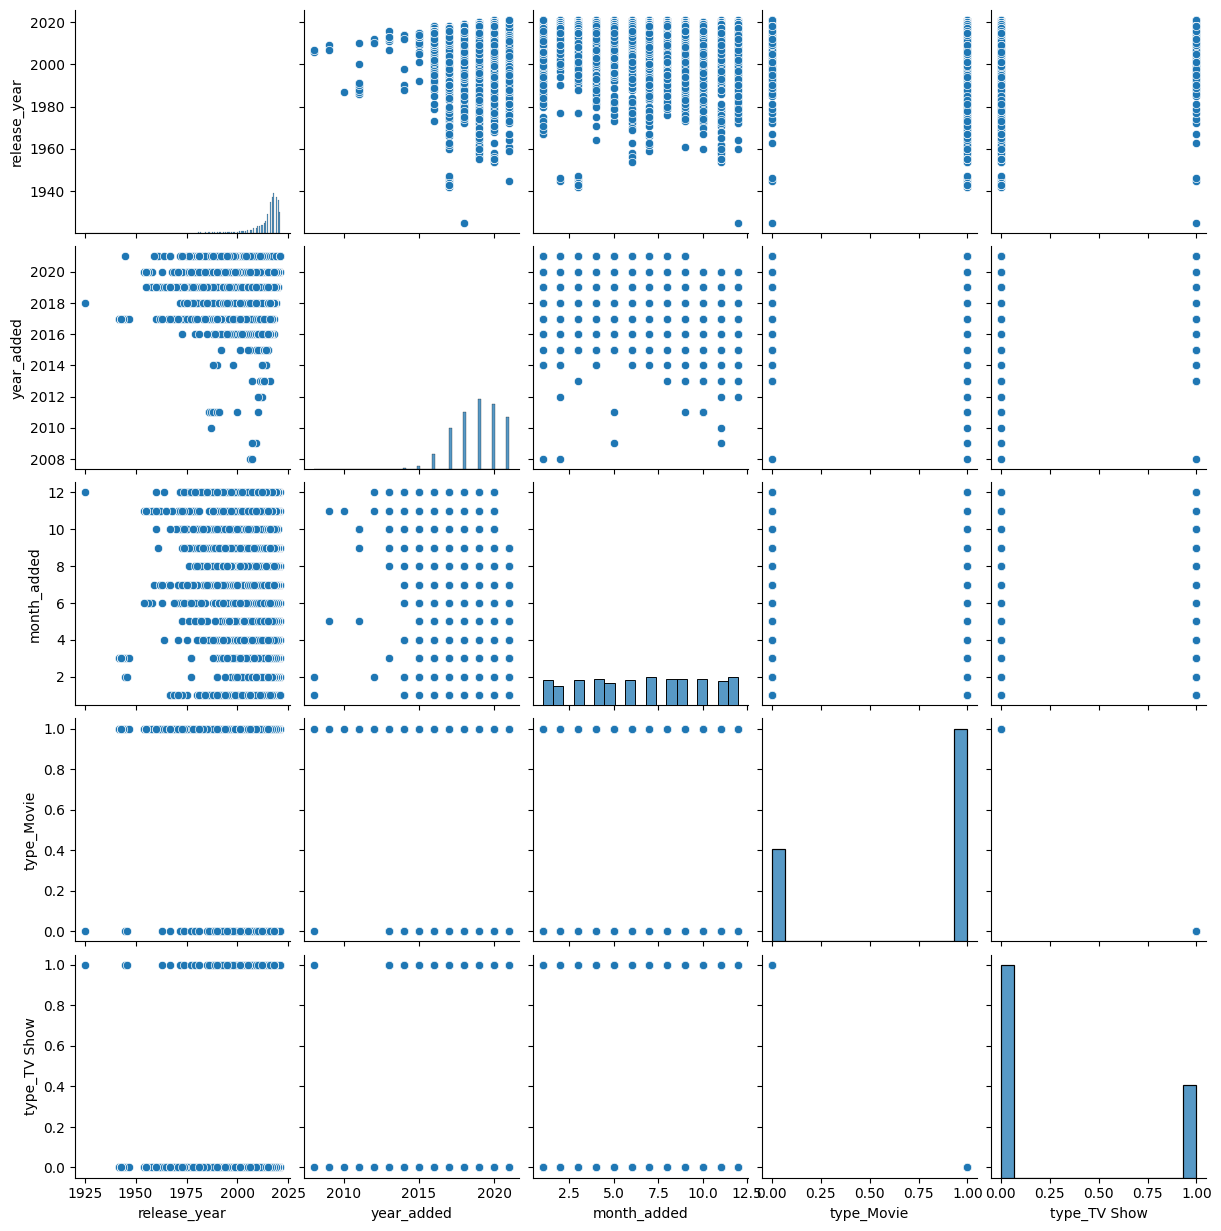

In [ ]:
#@title Pairplot
plt.figure(figsize=(15,10))
sns.pairplot(correlation_data)
plt.show()

In [ ]:
#@title 2. Comparison of tv shows vs. movies.


In [ ]:
#@title a. Find the number of movies produced in each country and pick the top 10 countries.
movie_data=data_unnested[(data_unnested['type']=='Movie')&(data_unnested['country']!='unknown_country')]


In [ ]:
movie_data=movie_data.drop_duplicates(subset=['show_id','country'],keep='first')

In [ ]:
movie_data.groupby(['country'])['show_id'].count().sort_values(ascending=False).head(10)


country
United States     2749
India              962
United Kingdom     534
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: show_id, dtype: int64

One-Third of the movies on Netflix have been produced in the United States while movies from India are well ahead of the rest of the pack

In [ ]:
#@title b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.
tv_data=data_unnested[(data_unnested['type']=='TV Show')&(data_unnested['country']!='unknown_country')]

In [ ]:
tv_data=tv_data.drop_duplicates(subset=['show_id','country'],keep='first')

In [ ]:
tv_data.groupby(['country'])['show_id'].count().sort_values(ascending=False).head(10)

country
United States     932
United Kingdom    271
Japan             197
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          64
Spain              61
Name: show_id, dtype: int64

 Shows from United States are in a staggering amount in comparision with the other countries and only 5 of the countries have shows in excess of 100 on the platform

In [ ]:
# @title 3.Best time to launch a show


In [ ]:
new_data=data_unnested.drop_duplicates(subset=['show_id'],keep='first')

In [ ]:
new_data['year']=new_data['date_added'].dt.year
new_data['month']=new_data['date_added'].dt.month
new_data['day']=new_data['date_added'].dt.day

In [ ]:
month_mappings={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [ ]:
new_data['month']=new_data['month'].replace(month_mappings)

In [ ]:
#@title a.Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies
bin_labels=['week1','week2','week3','week4','week5']
bin_values=[1,7,14,21,28,32]
new_data['week']=pd.cut(new_data['day'],bins=bin_values,labels=bin_labels)

In [ ]:
new_data_tv_1=new_data[(new_data['type']=='TV Show')]
new_data_movie_1=new_data[(new_data['type']=='Movie')]

In [ ]:
new_data_tv_1.groupby(['week','type'])['show_id'].count().sort_values(ascending=False)

week   type   
week3  TV Show    655
week2  TV Show    444
week4  TV Show    430
week1  TV Show    392
week5  TV Show    223
Name: show_id, dtype: int64

3rd week of the month that is after half of the month has been the most succesful one to launch a TV show on Netflix and start and end of the month are the least successful ones to launch a TV Show

In [ ]:
new_data_movie_1.groupby(['week','type'])['show_id'].count().sort_values(ascending=False)

week   type 
week3  Movie    1391
week4  Movie     930
week1  Movie     893
week2  Movie     821
week5  Movie     402
Name: show_id, dtype: int64

Like TV Shows it is best to launch Movie between 14th and 21st day of the month

In [ ]:
#@title b.Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies
new_data_tv_1.groupby(['month','type'])['show_id'].count().sort_values(ascending=False)

month      type   
December   TV Show    265
July       TV Show    262
September  TV Show    251
August     TV Show    236
June       TV Show    236
October    TV Show    215
April      TV Show    214
March      TV Show    213
November   TV Show    207
May        TV Show    193
January    TV Show    192
February   TV Show    180
Name: show_id, dtype: int64

While there is not much of clear distribution at the top in best month to launch a TV Show it is found that releases are done more in the 2nd half of the year as 5 of the 6 top months are post June with January and Febraury being the least favourable months for release of a TV Show

In [ ]:
new_data_movie_1.groupby(['month','type'])['show_id'].count().sort_values(ascending=False)

month      type 
July       Movie    565
April      Movie    549
December   Movie    547
January    Movie    545
October    Movie    545
March      Movie    528
August     Movie    518
September  Movie    518
November   Movie    498
June       Movie    492
May        Movie    439
February   Movie    382
Name: show_id, dtype: int64

July is the most preferable month to launch a Movie while Febraury(like TV show) is found to be the last in the pecking order

In [ ]:
# @title 4. Analysis of actors/directors of different types of shows/movies.

In [ ]:
#@title a. Identify the top 10 actors who have appeared in most movies or TV shows.

actor_data=data_unnested[(data_unnested['actor']!='unknown_cast')]

In [ ]:
actor_data=actor_data.drop_duplicates(subset=['show_id','actor'],keep='first')

In [ ]:
actor_data.groupby(['actor'])['show_id'].count().sort_values(ascending=False).head(10)

actor
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Amitabh Bachchan    28
Name: show_id, dtype: int64

Majority of actors with most titles on the platform are from India with 'Anupam Kher' having a whopping 43 shows of his on the platform and 'Shah Rukh Khan' having 35 shows on platform. The legendary 'Amitabh Bachchan' sits at the 10th position with 28 of his titles on the platform.

In [ ]:
#@title b. Identify the top 10 directors who have appeared in most movies or TV shows.

director_data=data_unnested[(data_unnested['director']!='unknown_director')]

In [ ]:
director_data=director_data.drop_duplicates(subset=['show_id','director'],keep='first')

In [ ]:
director_data.groupby(['director','type'])['show_id'].count().sort_values(ascending=False).head(10)

director             type 
Rajiv Chilaka        Movie    22
Jan Suter            Movie    21
Raúl Campos          Movie    19
Suhas Kadav          Movie    16
Jay Karas            Movie    15
Marcus Raboy         Movie    15
Cathy Garcia-Molina  Movie    13
Martin Scorsese      Movie    12
Jay Chapman          Movie    12
Youssef Chahine      Movie    12
Name: show_id, dtype: int64

The directors list is again topped by an Indian in 'Rajiv  Chilaka' while award winning director 'Martin Scorsese' has 12 of his titles on Netflix.

In [ ]:
#@title 5. Which genre movies are more popular or produced more


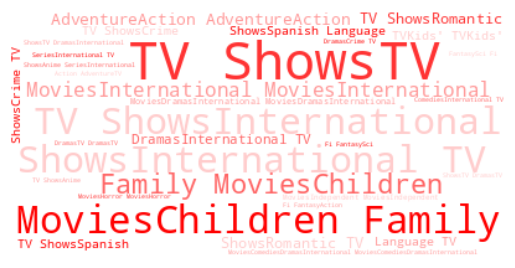

In [ ]:
text =''.join(data_unnested['genre'].astype(str))

custom_map=ListedColormap(["#FF0000", "#FF3333", "#FF6666", "#FF9999", "#FFCCCC"])
wordcloud = WordCloud(colormap=custom_map,background_color='White').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It can be inferred that people using Netflix tend to watch more shows from Genres like
- Family
- International
- Children
- Dramas
- Adventure and Action
Also a good chunk of people watch 'Romantic' and 'Crime' centric shows


In [ ]:
#@title 6.Time between  release and adding to Netflix


In [ ]:
def time(x):
  return x['date_added'].year-x['release_year']

In [ ]:
ten_year_data=data_cleaned[(data_cleaned['release_year']>=2012)]

In [ ]:
ten_year_data=ten_year_data.drop_duplicates(subset=['show_id'],keep='first')

In [ ]:
ten_year_data['year_diff']=ten_year_data.apply(time,axis=1)

In [ ]:
ten_year_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_diff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,unknown_director,unknown_cast,unknown_country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


In [ ]:
ten_year_diff_data=ten_year_data.groupby(['type'])['year_diff'].mean().sort_values(ascending=False)
ten_year_diff_data

type
Movie      1.626738
TV Show    1.052369
Name: year_diff, dtype: float64

From 2011 TV Shows are being added on Netflix on an average of 1 year of their release date while movies have atken a little over an year and a half on average to be released on the platform. This has given the viewer flexibilty and control to watch the content as early as possible while the show is still fresh and relevent

In [ ]:
#@title 7. Type vs Rating
type_data_1=data_unnested.drop_duplicates(subset=['show_id'],keep='first')

In [ ]:
type_data_1=type_data_1[type_data_1['rating']!='unknown_rating']

In [ ]:
type_data_1=type_data_1.groupby(['type','rating'])['show_id'].count().sort_values(ascending=False).head(10).reset_index()

In [ ]:
type_data_1.index=type_data_1.index+1

In [ ]:
type_data_1

,type,rating,show_id
1,Movie,TV-MA,2062
2,Movie,TV-14,1427
3,TV Show,TV-MA,1143
4,Movie,R,797
5,TV Show,TV-14,730
6,Movie,TV-PG,540
7,Movie,PG-13,490
8,TV Show,TV-PG,321
9,Movie,PG,287
10,TV Show,TV-Y7,194


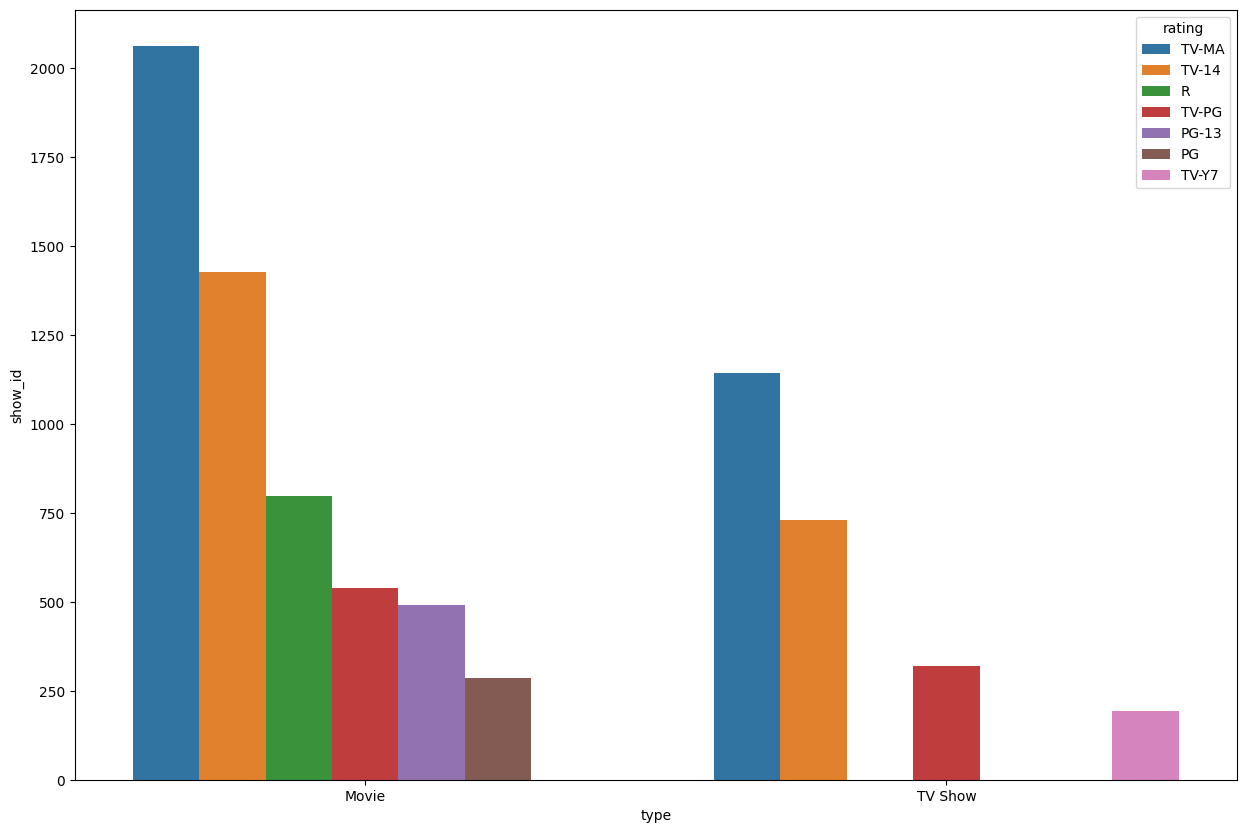

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='type',y='show_id',hue='rating',data=type_data_1)
plt.show()

Shows for mature and above 14 audience are pre dominant in both Movies and shows while a fair chunk of 'Parental guided' rated shows are listed in both of them. It can be noted that none of the TV Shows are 'R' rated

In [ ]:
#@title 8. Genre vs Rating

In [ ]:
genre_data_2=data_unnested.drop_duplicates(subset=['show_id','genre'],keep='first')

In [ ]:
genre_data_2=genre_data_2[genre_data_2['rating']!='unknown_rating']

In [ ]:
genre_data_2=genre_data_2.groupby(['genre','rating'])['show_id'].count().sort_values(ascending=False).head(10).reset_index()

In [ ]:
genre_data_2.index=genre_data_2.index+1

In [ ]:
genre_data_2

,genre,rating,show_id
1,International Movies,TV-MA,1130
2,International Movies,TV-14,1065
3,Dramas,TV-MA,830
4,International TV Shows,TV-MA,714
5,Dramas,TV-14,693
6,International TV Shows,TV-14,471
7,Comedies,TV-14,465
8,TV Dramas,TV-MA,433
9,Comedies,TV-MA,431
10,Dramas,R,375


Highest no of shows on Netflix fall under category of International Movies rated for mature audience followed by International Movies for audience above the age of 14. It can be inferred that most shows on Netflix are catered for matured audience and of age above 14 and most of those follow under the International Movies and Drama Genre

In [ ]:
#@title 9. Rating vs Duration(TV Shows)

In [ ]:
duration_data_1=data_unnested.drop_duplicates(subset=['show_id'],keep='first')

In [ ]:
duration_data_1=duration_data_1[(duration_data_1['rating']!='unknown_rating')& (duration_data_1['type']=='TV Show')]

In [ ]:
duration_data_1['duration']=duration_data_1['duration'].str.split(' ').str[0]

In [ ]:
duration_data_1['duration']=duration_data_1['duration'].astype(str).astype(int)

In [ ]:
bin_labels_new=['Short','Medium','Long']
bin_values_new=[0,3,6,25]
duration_data_1['duration_buckets']=pd.cut(duration_data_1['duration'],bins=bin_values_new,labels=bin_labels_new)

In [ ]:
duration_data_1.groupby(['duration_buckets'])['show_id'].count().sort_values(ascending=False).head(10).reset_index()

,duration_buckets,show_id
0,Short,2410
1,Medium,191
2,Long,63


Most TV shows on the platform are 2 season long or less while only 63 of them have run longer than 5 seasons

In [ ]:
#@title 10. Movies and TV Shows last 5 years

In [ ]:
last_7_year_data=data_cleaned[(data_cleaned['release_year']>=2015)]

In [ ]:
last_7_year_data=last_7_year_data.drop_duplicates(subset=['show_id'],keep='first')

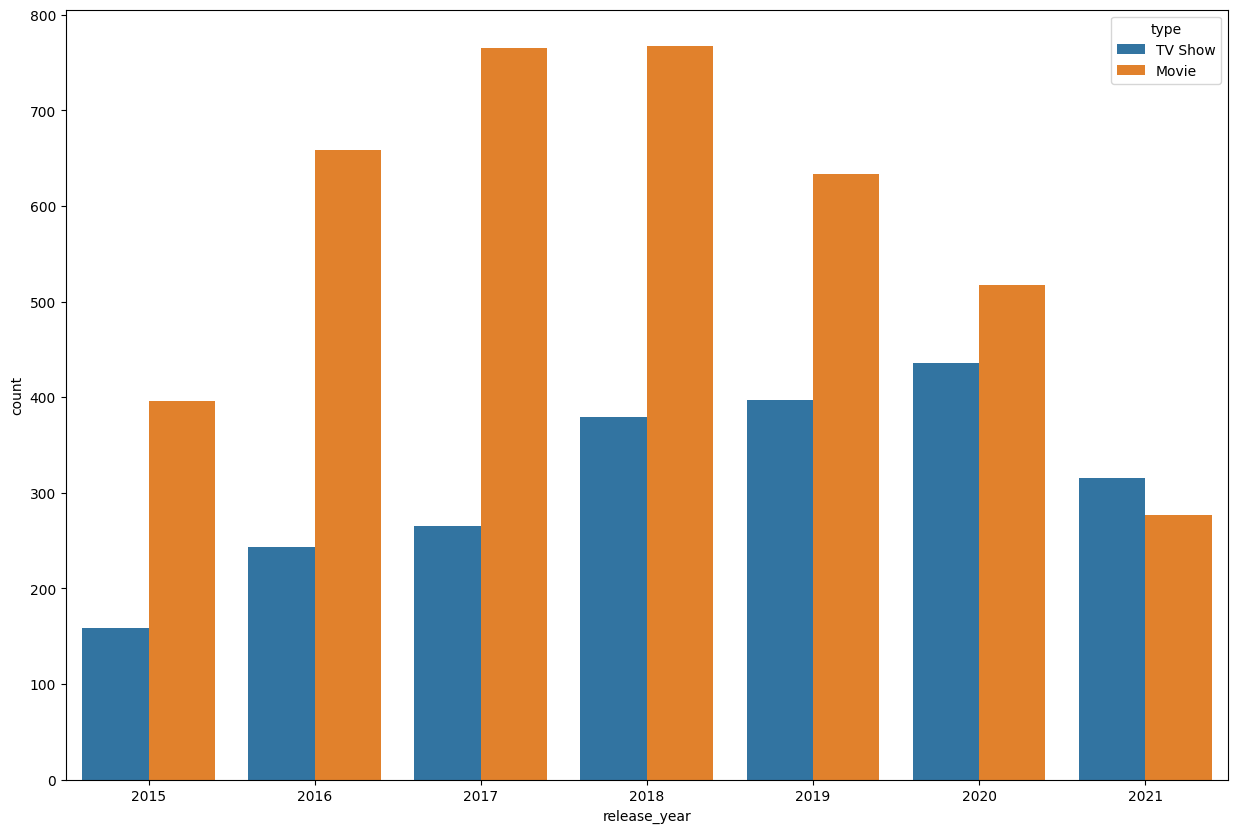

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='release_year',data=last_7_year_data,hue='type')
plt.show()

The shift of trend from Movies to TV shows is clearly visible in the above graph as  we can see a steady increase in TV Shows added released more recently from year to year while latest Movies added on the platform has declined significantly after 2018

In [ ]:
#@title 11. Movies released after 2000
movie_data_25=data_cleaned[(data_cleaned['release_year']>=2000)]


In [ ]:
movie_data_25=movie_data_25.drop_duplicates(subset=['show_id'],keep='first')

In [ ]:
movie_data_25=movie_data_25[movie_data_25['type']=='Movie']

In [ ]:
movie_plot_data=movie_data_25.groupby(['release_year'])['show_id'].count().sort_values(ascending=False)

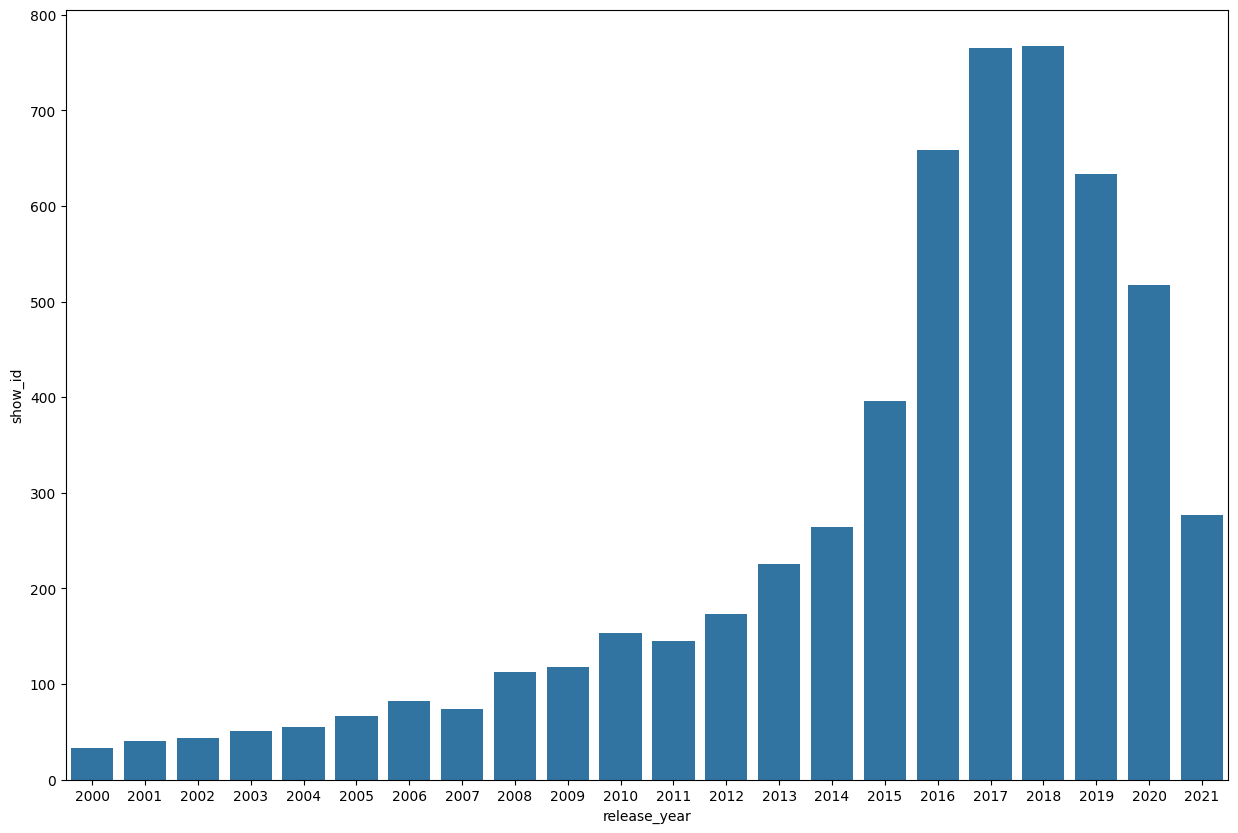

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=movie_plot_data.index,y=movie_plot_data)
plt.show()

While movies on the platform released till 2018 have seen steady increase in addition to Netflix the numbers have dropped post 2018

# <h1 align="center"> <font color='Yellow'><font size=6>Recommendations:</font> </font></h1>
- Increase More shows produced in countries other than United States as there is a huge discrepency in No of shows from US and other countries
- Increase more shows of rating TV-Y7 & TV-Y considering the fact that family is one of the top genres
- Add more recently released movies as the no of addition of recently released movies has gone down significantly
- Focus more on movies under 2 hrs as they tend to be watched more
- Increase duration of shows as there are too many shows with 2 or less seasons
- While the no of movies from India are quite high, there are very less shows of Indian production , this can be increased to engage more users who are already watching the huge set of Indian movies available
- Since the no of Movies and TV Shows released in Jan and Feb are quite low, shows targetting that particular season can be released to engage more users
- Apart from the more popular genres listed above, shows from genres like 'Crime','Romance','Spanish Language' are on the rise and Netflix can add more shows of these genres to increase relevance and user interaction
- The average time between release of a show and adding it to netflix should be further reduced so that customers can watch these as soon as possible
- No of TV Shows from before 2010 can be added more to the catalogue as they are in a lesser no